# Вычислительная математика
## Численное дифференцирование

Иван Цыбулин, Ярослав Холодов

## Погрешность машинного представления
Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right]
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:
$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-(K+1)}
$$

## Одинарная и двойная точность
Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$

## Приближенные методы
Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**.



## Накопление ошибок округления
Cуммируя величину $\displaystyle S_n = \sum_{k=0}^{n-1} a_n$
в машинной арифметике, мы на самом деле суммируем *округленные* величины. Каждое слагаемое $a_n$ представлено с абсолютной погрешностью $\Delta a_n \leqslant |a_n| \cdot \delta$, где $\delta$ — относительная ошибка округления. 

Так как при суммировании чисел их абсолюная погрешность суммируется, при вычислении $S_n$ накопится ошибка
$$
\Delta S_n \leqslant \varepsilon_\text{round} = \sum_{k=0}^{n-1} |a_n| \cdot \delta = \delta \cdot \sum_{k=0}^{n-1} |a_n|.
$$

## Численное дифференцирование
Дана функция $f(x)$ в виде черного ящика: ее можно вычислять в различных точках $x$ и получать резлультат с погрешностью $\Delta f$. Известно, что функция достаточно гладкая, но конкретный вид функции не задан. Необходимо получить значение ее производной $f'(x)$ в точке $x_0$.

Вспомним определение производной
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}.
$$

## Конечные разности
Рассмотрим в качестве приближенного метода
$$
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$
при некотором значении $h > 0$. Интуитивно понятно, что чем меньше $h$, тем точнее метод. Покажем это, найдя ошибку метода. Для этого нужно оценить величину
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|
$$

## Оценка ошибки метода для конечных разностей

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:
$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h].\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}.
$$
Пусть известно, что $|f''(\xi)| \leq M_2$. Тогда ошибку метода можно оценить как
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
$$

Из оценки
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant \varepsilon_\text{method} = \frac{M_2 h}{2}.
$$
видно, что ошибка метода стремится к нулю при $h \to 0$, причем $ \varepsilon_\text{method} = O(h)$.

Говорят, что данный метод имеет *первый порядок*, так как его ошибка стремится к нулю как первая степень величины $h$, которую называют *шагом дифференцирования*

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$
Пользуясь такими же разложениями
$$
f(x_0 \pm h) = f(x_0) \pm f'(x_0) h + \frac{f''(x_0)}{2} h^2 \pm \frac{f'''(\xi_{1,2})}{6} h^3,\\
\xi_1 \in [x_0 - h, x_0], \xi_2 \in [x_0, x_0 + h],
$$
заключаем, что
$$
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| = \frac{|f'''(\xi_2) + f'''(\xi_1)|h^2}{12},\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| \leqslant  \varepsilon_\text{method} = \frac{M_3 h^2}{6}, \qquad M_3 = \max |f'''(\xi)|
$$
Отметим, что данный метод имеет *второй порядок*, так как $\varepsilon_\text{method} = O(h^2)$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

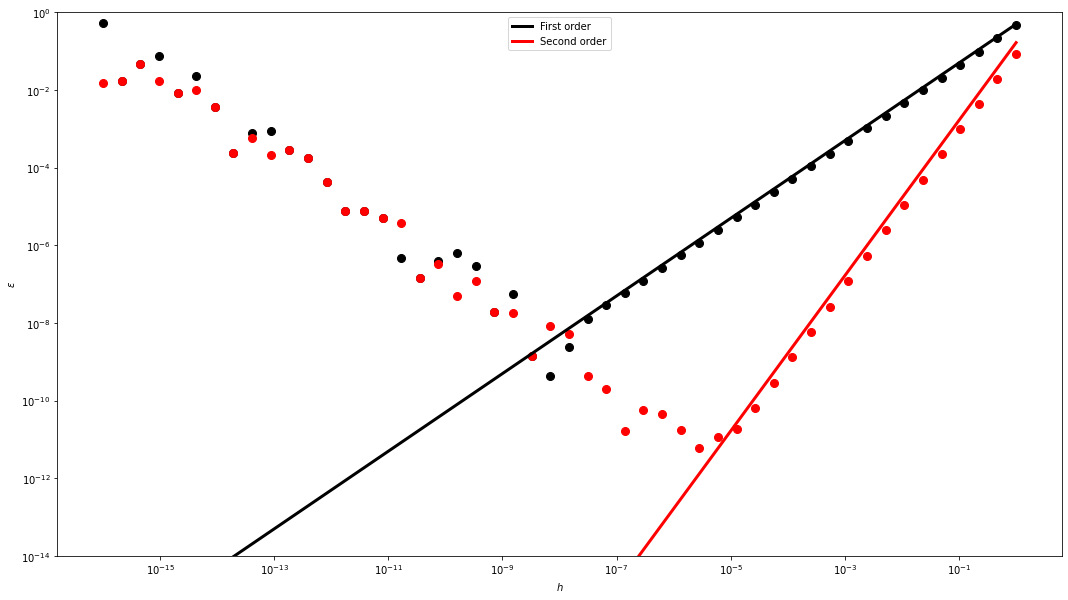

In [10]:
def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1

errs1 = np.abs(diff1(np.sin, 1, hs) - np.cos(1))
errs2 = np.abs(diff2(np.sin, 1, hs) - np.cos(1))

M2 = M3 = 1
plt.figure(figsize=(18, 10))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()

## Погрешности при дифференцировании

Вспомним, что функция $f(x)$ вычисляется с погрешностью $\Delta f$. При вычислении
$$f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
из-за приближенных значений $f(x_0 + h)$ и $f(x_0)$ появляется ошибка
$$
\varepsilon_\text{comp} = \frac{2\Delta f}{h}
$$
соответственно. Эта ошибка при уменьшении $h$ *растет* как $O(h^{-1})$. 

## Оптимальный шаг дифференцирования

При дифференцировании функции имеются два основных источника погрешности
 * Ошибка метода — уменьшается при уменьшении $h$
 * Ошибка вычислений — растет при уменьшении $h$
 
Поскольку характер роста ошибок различный, существует неокторое значение $h^*$, при котором ошибка минимальна. Рассмотим полную ошибку $$
\varepsilon_\text{total} = \varepsilon_\text{method} + \varepsilon_\text{comp}
$$
как функцию от $h$ и найдем минимум.

Продифферецируем полную ошибку
$$
\varepsilon_{\text{total}}(h) = \frac{M_2h}{2} + \frac{2\Delta f}{h}\\
$$
по $h$:
$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_2}{2} - \frac{2\Delta f}{{h^*}^2}\\h^* = 2\sqrt\frac{\Delta f}{M_2}
$$

Для функции $f(x) = \sin x$ оценки производных $M_2 = M_3 = 1$. Также примем $\Delta f = 10^{-16}$. При этом
$$
h^* = 2 \cdot 10^{-8}, \qquad \varepsilon_{\text{total}}^* = 2\cdot 10^{-8}
$$

Проделав то же самое для формулы дифференцирования второго порядка, получаем
$$
\varepsilon_{\text{total}}(h) = \frac{M_3h^2}{6} + \frac{2\Delta f}{2h}\\
$$
по $h$:
$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_3h^*}{3} - \frac{\Delta f}{{h^*}^2}\\h^* = \sqrt[3]\frac{3\Delta f}{M_3}
$$

При тех же значениях $M_2, M_3$ и $\Delta f$ получаем
$$
h^* \approx 6.69 \cdot 10^{-6}, \qquad \varepsilon_{\text{total}}^* \approx 2.24\cdot 10^{-11}
$$

Хорошо видно, что метод второго порядка позволил добиться более высокой точности при большем шаге дифференцирования.

Методы повышеного порядка обычно позволяют
* добиться большей точности при меньших вычислительных затаратах
* получить более точный результат в рамках той же точности вычислений